In [ ]:
# --- 
# Tutorial for Lecture 01, created by Baojian Zhou (bjzhou@fudan.edu.cn)
# This file is opened via Jupyter-notebook. To Install it,
# please check details in: https://jupyter.org/install
# install Jupyter: conda install anaconda::jupyter

# --- 
# Python for beginner (Python & Pycharm)
# If you have zero knowledge about Python, no worry. Here is an one hour course: 
#    https://www.youtube.com/watch?v=kqtD5dpn9C8
# You can continue to learn the rest after watching this short-course.
# Here is a simple Python code:

<h2 style="text-align: center;">Section 2.1 Regular Expression</h2>

In [1]:
# in Python, there is a built in lib re, we can import them
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sn

ModuleNotFoundError: No module named 'seaborn'

In [5]:
# --- Slides 57
# Task: Find woodchuck or Woodchuck : Disjunction
test_str = "This string contains Woodchuck and woodchuck."
test_str_2 = '[wW]ooodchuck'
result=re.search(pattern=r"[wW]oodchuck", string=test_str)
print(result)
result=re.search(pattern=r"[wW]ooodchuck", string=test_str)
print(result)

<re.Match object; span=(21, 30), match='Woodchuck'>
None


In [3]:
# Find the word "woodchuck" in the following test string
test_str = "interesting links to woodchucks ! and lemurs!"
re.search(pattern="woodchuck", string=test_str)

# Find !, it follows the same way:
print(re.search(pattern="!", string=test_str))
print(re.search(pattern="!!", string=test_str))
assert re.search(pattern="!!", string=test_str) == None # match nothing


<re.Match object; span=(32, 33), match='!'>
None


In [6]:
# Find any single digit in a string.
result=re.search(pattern=r"[0123456789]", string="plenty of 7 to 5")
print(result)
result=re.search(pattern=r"[0-9]", string="plenty of 7 to 5")
print(result)

<re.Match object; span=(10, 11), match='7'>
<re.Match object; span=(10, 11), match='7'>


In [7]:
# ---Slides 58
# Negation: If the caret ^ is the first symbol after [,
# the resulting pattern is negated. For example, the pattern 
# [^a] matches any single character (including special characters) except a.

# -- not an upper case letter
print(re.search(pattern=r"[^A-Z]", string="Oyfn pripetchik"))

# -- neither 'S' nor 's'
print(re.search(pattern=r"[^Ss]", string="I have no exquisite reason for't"))

# -- not a period
print(re.search(pattern=r"[^.]", string="our resident Djinn"))

# -- either 'e' or '^'
print(re.search(pattern=r"[e^]", string="look up ^ now"))

# -- the pattern ‘a^b’
print(re.search(pattern=r'a\^b', string=r'look up a^b now'))

<re.Match object; span=(1, 2), match='y'>
<re.Match object; span=(0, 1), match='I'>
<re.Match object; span=(0, 1), match='o'>
<re.Match object; span=(8, 9), match='^'>
<re.Match object; span=(8, 11), match='a^b'>


In [8]:
# --- Slides 59
# More disjuncations
str1 = "Woodchucks is another name for groundhog!"
result = re.search(pattern="groundhog|woodchuck",string=str1)
print(result)

str1 = "Find all woodchuckk Woodchuck Groundhog groundhogxxx!"
result = re.findall(pattern="[gG]roundhog|[Ww]oodchuck",string=str1)
print(result)

<re.Match object; span=(31, 40), match='groundhog'>
['woodchuck', 'Woodchuck', 'Groundhog', 'groundhog']


In [9]:
# --- Slides 60
# Some special chars

# ?: Optional previous char
str1 = "Find all color colour colouur colouuur colouyr"
result = re.findall(pattern="colou?r",string=str1)
print(result)

# *: 0 or more of previous char
str1 = "Find all color colour colouur colouuur colouyr"
result = re.findall(pattern="colou*r",string=str1)
print(result)

# +: 1 or more of previous char
str1 = "baa baaa baaaa baaaaa"
result = re.findall(pattern="baa+",string=str1)
print(result)
# .: any char
str1 = "begin begun begun beg3n"
result = re.findall(pattern="beg.n",string=str1)
print(result)
str1 = "The end."
result = re.findall(pattern="\.$",string=str1)
print(result)
str1 = "The end? The end. #t"
result = re.findall(pattern=".$",string=str1)
print(result)

['color', 'colour']
['color', 'colour', 'colouur', 'colouuur']
['baa', 'baaa', 'baaaa', 'baaaaa']
['begin', 'begun', 'begun', 'beg3n']
['.']
['t']


In [10]:
# --- Slides 61
# find all "the" in a raw text.
text = "If two sequences in an alignment share a common ancestor, \
mismatches can be interpreted as point mutations and gaps as indels (that \
is, insertion or deletion mutations) introduced in one or both lineages in \
the time since they diverged from one another. In sequence alignments of \
proteins, the degree of similarity between amino acids occupying a \
particular position in the sequence can be interpreted as a rough \
measure of how conserved a particular region or sequence motif is \
among lineages. The absence of substitutions, or the presence of \
only very conservative substitutions (that is, the substitution of \
amino acids whose side chains have similar biochemical properties) in \
a particular region of the sequence, suggest [3] that this region has \
structural or functional importance. Although DNA and RNA nucleotide bases \
are more similar to each other than are amino acids, the conservation of \
base pairs can indicate a similar functional or structural role."
matches = re.findall("[^a-zA-Z][tT]he[^a-zA-Z]", text)
print(matches)

[' the ', ' the ', ' the ', ' The ', ' the ', ' the ', ' the ', ' the ']


In [11]:
# A nicer way is to do the following

matches = re.findall(r"\b[tT]he\b", text)
print(matches)

['the', 'the', 'the', 'The', 'the', 'the', 'the', 'the']


In [ ]:
# Task: Implement the task shown in Slides 62
# You may need to
# 1. Download a Wikipedia article xml file
# 2. Use RE to extract links.

<h2 style="text-align: center;">Section 2.2, 2.3, 2.4 Words and Corpus</h2>

In [12]:
# try to download some corpus
nltk.download('brown')

[nltk_data] Downloading package brown to D:\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [13]:
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.corpus import indian
from nltk.corpus import conll2007

### Word types and word instances (tokens)

- **Word types** are the number of distinct words in a corpus; if the set of words in the vocabulary is $V$, the number of types is the vocabulary size $|V|$. 

- **Word instances** are the total number $N$ of running words.

In [14]:
print(brown.words())
print(f"total number of tokens in Brown corpus: {len(brown.words())}")
for cat in brown.categories():
    print(f"category {cat} has {len(brown.words(categories=cat))} tokens")
print(f"It has {len(nltk.FreqDist(w.lower() for w in brown.words()))} case-insensitive types")
print(f"It has {len(nltk.FreqDist(w for w in brown.words()))} case-senstive types")

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
total number of tokens in Brown corpus: 1161192
category adventure has 69342 tokens
category belles_lettres has 173096 tokens
category editorial has 61604 tokens
category fiction has 68488 tokens
category government has 70117 tokens
category hobbies has 82345 tokens
category humor has 21695 tokens
category learned has 181888 tokens
category lore has 110299 tokens
category mystery has 57169 tokens
category news has 100554 tokens
category religion has 39399 tokens
category reviews has 40704 tokens
category romance has 70022 tokens
category science_fiction has 14470 tokens
It has 49815 case-insensitive types
It has 56057 case-senstive types


In [15]:
news_text = brown.words(categories='news')
fdist = len(nltk.FreqDist(w.lower() for w in news_text))
fdist_case_sensitive = len(nltk.FreqDist(w for w in news_text))
print(f"there are {fdist} different words in news category!")
print(f"there are {fdist_case_sensitive} case sensitive words in news category!")

there are 13112 different words in news category!
there are 14394 case sensitive words in news category!


In [ ]:
fdist = len(nltk.FreqDist(w.lower() for w in brown.words()))
fdist_case_sensitive = len(nltk.FreqDist(w for w in brown.words()))
print(f"there are {fdist} different words among all category!")
print(f"there are {fdist_case_sensitive} case sensitive words among all category!")

In [16]:
from nltk.corpus import brown
print(f"all categories of brown: {brown.categories()}")
print(f"all words in news: {brown.words(categories='news')}")
print(brown.words(fileids=['cg22']))
print(brown.sents(categories=['news', 'editorial', 'reviews']))

all categories of brown: ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
all words in news: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]
[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]


In [17]:
print(f"brown corpus has {len(brown.fileids())} files in total, it belongs to {len(brown.categories())} categories")
print(f"first 10 file names: {brown.fileids()[:10]}")

brown corpus has 500 files in total, it belongs to 15 categories
first 10 file names: ['ca01', 'ca02', 'ca03', 'ca04', 'ca05', 'ca06', 'ca07', 'ca08', 'ca09', 'ca10']


In [18]:
from nltk.corpus import gutenberg
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [19]:
emma_words = gutenberg.words('austen-emma.txt')
type(emma_words)
print(gutenberg.words('austen-emma.txt'))
# How many tokens in the text:
print("Token count:", len(emma_words))

# What is the token at index 1000?
print("token at index 1000:", emma_words[1000])

# Slice from token 1400 to 1500
print("slice from 1400 to 1500:", emma_words[1400:1500])

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]
Token count: 192427
token at index 1000: did
slice from 1400 to 1500: ['a', 'house', 'of', 'her', 'own', '?', 'This', 'is', 'three', 'times', 'as', 'large', '.--', 'And', 'you', 'have', 'never', 'any', 'odd', 'humours', ',', 'my', 'dear', '."', '"', 'How', 'often', 'we', 'shall', 'be', 'going', 'to', 'see', 'them', ',', 'and', 'they', 'coming', 'to', 'see', 'us', '!--', 'We', 'shall', 'be', 'always', 'meeting', '!', '_We_', 'must', 'begin', ';', 'we', 'must', 'go', 'and', 'pay', 'wedding', 'visit', 'very', 'soon', '."', '"', 'My', 'dear', ',', 'how', 'am', 'I', 'to', 'get', 'so', 'far', '?', 'Randalls', 'is', 'such', 'a', 'distance', '.', 'I', 'could', 'not', 'walk', 'half', 'so', 'far', '."', '"', 'No', ',', 'papa', ',', 'nobody', 'thought', 'of', 'your', 'walking', '.', 'We']


## Herdan’s Law or Heap's Law

- $N$: the number of word instances of corpus
- $|V|$: the number of word types

The larger the corpora we look at, the more word types we find, and in fact this relationship between $|V|$ and $N$ is called **Herdan's Law** or **Heaps' Law** after its discoverers (in linguistics and information retrieval respectively). Given $k$ and $\beta$ positive constants, and $0<\beta<1$, it has the following form

$$
|V|=k N^\beta.
$$

The value of $\beta$ depends on the corpus size and the genre, but at least for the large corpora, $\beta$ ranges from .67 to .75. Roughly then we can say that the vocabulary size for a text goes up significantly faster than the square root of its length in words. Let us test it!
Check more on [Heap\'s Law](https://en.wikipedia.org/wiki/Heaps%27_law).

In [21]:
%matplotlib inline
import matplotlib.pyplot
import seaborn
import numpy as np
# Try to center figures.
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [23]:
token_len = []
type_len = []
for words in [gutenberg.words(), indian.words(), conll2007.words()]:
    print(words)
    token_len.append(len(words))
    type_len.append(len(nltk.FreqDist(w.lower() for w in words)))
    print(token_len[-1], type_len[-1])

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]
2621613 42339
['মহিষের', 'সন্তান', ':', 'তোড়া', 'উপজাতি', '৷', ...]
48754 16143
['Las', 'reservas', 'de', 'oro', 'y', 'divisas', 'de', ...]
145156 29680


In [24]:
print(token_len)
sorted_ind = np.argsort(token_len)
print(sorted_ind)
sorted_N = [token_len[_] for _ in sorted_ind]
sorted_V = [type_len[_] for _ in sorted_ind]
print(sorted_N, sorted_V)

[2621613, 48754, 145156]
[1 2 0]
[48754, 145156, 2621613] [16143, 29680, 42339]


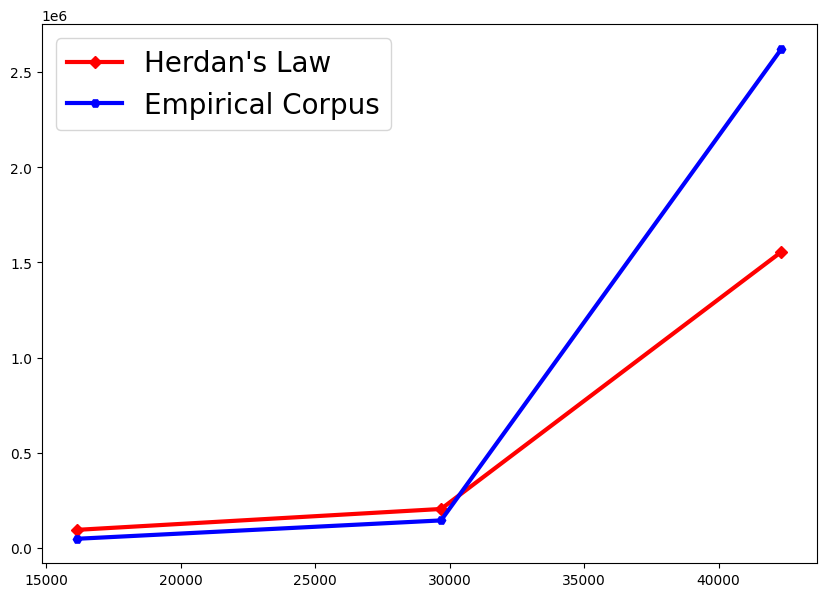

In [25]:
beta = .7
k = 50.
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(sorted_V, [k*(N**beta) for N in sorted(token_len)], c='r',marker="D",linewidth=3., label="Herdan's Law")
ax.plot(sorted_V, sorted_N, c='b',marker="H",linewidth=3., label="Empirical Corpus")
ax.legend(fontsize=20)

<h2 style="text-align: center;">Section 2.5 Word Tokenization</h2>

There are two type of tokenizations

- **Top-down tokenization**: We define a standard and implement rules to implement that kind of tokenization.
  - word tokenization
  - charater tokenization
- **Bottom-up tokenization**: We use simple statistics of letter sequences to break up words into subword tokens.
  - subword tokenization (modern LLMs use this type!)

### Top-down (rule-based) tokenization - word tokenization

In [26]:
# Use split method via the whitespace " "
text = """While the Unix command sequence just removed all the numbers and punctuation"""
print(text.split(" "))

['While', 'the', 'Unix', 'command', 'sequence', 'just', 'removed', 'all', 'the', 'numbers', 'and', 'punctuation']


In [27]:
# But, we have punctuations, icons, and many other small issues.
text = """Don't you love 🤗 Transformers? We sure do."""
print(text.split(" "))

["Don't", 'you', 'love', '🤗', 'Transformers?', 'We', 'sure', 'do.']


In [28]:
# Top-down tokenization by using regular expression
pattern = r'''(?x) # set flag to allow verbose regexps
(?:[A-Z]\.)+ # abbreviations, e.g. U.S.A. 
| \w+(?:-\w+)* # words with optional internal hyphens 
| \$?\d+(?:\.\d+)?%? # currency, percentages, e.g. $12.40, 82% 
| \.\.\. # ellipsis 
| [][.,;"'?():_`-] # these are separate tokens; includes ], [
'''
print(f'pattern needs to match is: \n\n{pattern}')

pattern needs to match is: 

(?x) # set flag to allow verbose regexps
(?:[A-Z]\.)+ # abbreviations, e.g. U.S.A. 
| \w+(?:-\w+)* # words with optional internal hyphens 
| \$?\d+(?:\.\d+)?%? # currency, percentages, e.g. $12.40, 82% 
| \.\.\. # ellipsis 
| [][.,;"'?():_`-] # these are separate tokens; includes ], [



In [29]:
text = """Don't you love 🤗 Transformers? We sure do."""
print(f"tokenized words after pattern matching: \n\n{nltk.regexp_tokenize(text, pattern)}")

tokenized words after pattern matching: 

['Don', "'", 't', 'you', 'love', 'Transformers', '?', 'We', 'sure', 'do', '.']


In [58]:
# spacy works much better
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
for token in doc: 
    print(token)

In
the
first
part
of
the
book
we
introduce
the
fundamental
suite
of
algorithmic
tools
that
make
up
the
modern
neural
language
model
that
is
the
heart
of
end
-
to
-
end
NLP
systems
.
We
begin
with
tokenization
and
preprocessing
,
as
well
as
useful
algorithms
like
computing
edit
distance
,
and
then
proceed
to
the
tasks
of
classification
,
logistic
regression
,
neural
networks
,
proceeding
through
feedforward
networks
,
recurrent
networks
,
and
then
transformers
.
We
’ll
also
see
the
role
of
embeddings
as
a
model
of
word
meaning
.


In [31]:
text = """While the Unix command sequence just removed all the numbers and punctuation,
for most NLP applications we’ll . But we’ll often want
to keep the punctuation that occurs word internally, in examples like m.p.h., Ph.D.,
AT&T, and cap’n. Special characters and numbers will need to be kept in prices
($45.55) and dates (01/02/06); we don’t want to segment that price into separate
tokens of “45” and “55”. And there are URLs (https://www.stanford.edu),
Twitter hashtags (#nlproc), or email addresses (someone@cs.colorado.edu).
Number expressions introduce other complications as well; while commas normally
appear at word boundaries, commas are used inside numbers in English, every
three digits: 555,500.50. (or sometimes periods)
where English puts commas, for example, 555 500,50."""
text = text.replace("\n", " ").strip()
print(f"tokenized words after pattern matching: \n\n{nltk.regexp_tokenize(text, pattern)}")

tokenized words after pattern matching: 

['While', 'the', 'Unix', 'command', 'sequence', 'just', 'removed', 'all', 'the', 'numbers', 'and', 'punctuation', ',', 'for', 'most', 'NLP', 'applications', 'we', 'll', '.', 'But', 'we', 'll', 'often', 'want', 'to', 'keep', 'the', 'punctuation', 'that', 'occurs', 'word', 'internally', ',', 'in', 'examples', 'like', 'm', '.', 'p', '.', 'h', '.', ',', 'Ph', '.', 'D.', ',', 'AT', 'T', ',', 'and', 'cap', 'n', '.', 'Special', 'characters', 'and', 'numbers', 'will', 'need', 'to', 'be', 'kept', 'in', 'prices', '(', '$45.55', ')', 'and', 'dates', '(', '01', '02', '06', ')', ';', 'we', 'don', 't', 'want', 'to', 'segment', 'that', 'price', 'into', 'separate', 'tokens', 'of', '45', 'and', '55', '.', 'And', 'there', 'are', 'URLs', '(', 'https', ':', 'www', '.', 'stanford', '.', 'edu', ')', ',', 'Twitter', 'hashtags', '(', 'nlproc', ')', ',', 'or', 'email', 'addresses', '(', 'someone', 'cs', '.', 'colorado', '.', 'edu', ')', '.', 'Number', 'expressions', 'i

In [32]:
# Tokenization is more complex in languages like written Chinese, Japanese.
from nltk.tokenize.treebank import TreebankWordTokenizer
text = '姚明进入总决赛'
t = TreebankWordTokenizer()
toks = t.tokenize(text)
print(toks)

['姚明进入总决赛']


In [34]:
# StanfordSegmenter for Chinese 
from nltk.tokenize.stanford_segmenter import StanfordSegmenter
# Note, it needs to install jar file.
# Alternative way to tokenize Chinese words
# install jieba via conda as: conda install conda-forge::jieba
# Website: https://github.com/fxsjy/jieba
import jieba

In [35]:
text = '姚明进入总决赛'
seg_list = jieba.cut(text)
print(", ".join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\WINDOWS\TEMP\jieba.cache
Loading model cost 0.820 seconds.
Prefix dict has been built successfully.


姚明, 进入, 总决赛


In [39]:
import spacy
nlp = spacy.load("zh_core_web_sm")
text = '姚明进入总决赛'
doc = nlp(text)
for token in doc: 
    print(token)

姚明
进入
总决赛


### Top-down (rule-based) tokenization - character tokenization

In [40]:
from spacy.lang.zh import Chinese
nlp_ch = Chinese()
print(*nlp_ch(text), sep='\n')

姚
明
进
入
总
决
赛


In [ ]:
# Task: Try an example of Japanese.

### Byte-Pair Encoding: A Bottom-up Tokenization Algorithm
- It has been adopted from all modern LLMs including ChatGPT, GPT-series, and many others.

In [42]:
# First of all, install GPT-4's tiktoken via: conda install conda-forge::tiktoken
import tiktoken
# Load an encoding
encoding = tiktoken.get_encoding("cl100k_base")
# Use tiktoken.encoding_for_model() to automatically load the correct encoding for a given model name.
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
print(encoding.encode("tiktoken is great!"))

[83, 1609, 5963, 374, 2294, 0]


In [43]:
# Count tokens by counting the length of the list returned by .encode().
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [44]:
text = "tiktoken is great!"
print(f'\"{text}\" has been encoded into {num_tokens_from_string(text, "cl100k_base")} subwords')

"tiktoken is great!" has been encoded into 6 subwords


In [45]:
# .decode() converts a list of token integers to a string.
encode_ids = [83, 1609, 5963, 374, 2294, 0]
print(f'the decoded string is: \"{encoding.decode(encode_ids)}\"')

the decoded string is: "tiktoken is great!"


In [46]:
text = """
Chapters 5 to 8 teach the basics of 🤗 Datasets and 🤗 Tokenizers before diving into classic NLP tasks.\
By the end of this part, you will be able to tackle the most common NLP problems by yourself. \
By the end of this part, you will be ready to apply 🤗 Transformers to (almost) any machine \
learning problem! E=mc^2. f(x) = x^2+y^2, print('hello world!’) baojianzhou. asdasfasdgasdg
"""
print(encoding.encode(text))

[198, 1163, 17881, 220, 20, 311, 220, 23, 4639, 279, 32874, 315, 11410, 97, 245, 423, 77749, 323, 11410, 97, 245, 9857, 12509, 1603, 43515, 1139, 11670, 452, 12852, 9256, 50006, 279, 842, 315, 420, 961, 11, 499, 690, 387, 3025, 311, 22118, 279, 1455, 4279, 452, 12852, 5435, 555, 6261, 13, 3296, 279, 842, 315, 420, 961, 11, 499, 690, 387, 5644, 311, 3881, 11410, 97, 245, 81632, 311, 320, 60301, 8, 904, 5780, 6975, 3575, 0, 469, 28, 13183, 61, 17, 13, 282, 2120, 8, 284, 865, 61, 17, 44110, 61, 17, 11, 1194, 493, 15339, 1917, 72434, 8, 293, 3524, 82991, 52865, 13, 439, 35989, 15192, 36238, 300, 36238, 198]


In [47]:
encode_ids = encoding.encode(text)
print(encoding.decode(encode_ids))


Chapters 5 to 8 teach the basics of 🤗 Datasets and 🤗 Tokenizers before diving into classic NLP tasks.By the end of this part, you will be able to tackle the most common NLP problems by yourself. By the end of this part, you will be ready to apply 🤗 Transformers to (almost) any machine learning problem! E=mc^2. f(x) = x^2+y^2, print('hello world!’) baojianzhou. asdasfasdgasdg



<h2 style="text-align: center;">Section 2.6 Word Normalization, Lemmatization and Stemming</h2>

### Lemmatization (词形还原)

- Lemmatization is the task of determining that two words have the same root, despite their surface differences.
- **Motivation**: For some NLP situations, we also want two morphologically different forms of a word to behave similarly. For example in web search, someone may type the string woodchucks but a useful system might want to also return pages
that mention woodchuck with no s.
- **Example 1**: The words am, are, and is have the shared lemma be.
- **Example 2**: The words dinner and dinners both have the lemma dinner.

In [48]:
import spacy
text = """
The Brown Corpus, a text corpus of American English that was compiled in the 1960s at Brown University, \
is widely used in the field of linguistics and natural language processing. It contains about 1 million \
words (or "tokens") across a diverse range of texts from 500 sources, categorized into 15 genres, such \
as news, editorial, and fiction, to provide a comprehensive resource for studying the English language. \
This corpus has been instrumental in the development and evaluation of various computational linguistics \
algorithms and tools.
"""
text = text.replace("\n", " ").strip()

In [49]:
print(text)

The Brown Corpus, a text corpus of American English that was compiled in the 1960s at Brown University, is widely used in the field of linguistics and natural language processing. It contains about 1 million words (or "tokens") across a diverse range of texts from 500 sources, categorized into 15 genres, such as news, editorial, and fiction, to provide a comprehensive resource for studying the English language. This corpus has been instrumental in the development and evaluation of various computational linguistics algorithms and tools.


In [50]:
nlp = spacy.load('en_core_web_sm')

In [51]:
doc = nlp(text)

In [52]:
print(doc[0], type(doc[0]))

The <class 'spacy.tokens.token.Token'>


In [53]:
lemmas = [token.lemma_ for token in doc]
for ori,lemma in zip(doc[:30], lemmas[:30]):
    print(ori, lemma)

The the
Brown Brown
Corpus Corpus
, ,
a a
text text
corpus corpus
of of
American american
English English
that that
was be
compiled compile
in in
the the
1960s 1960
at at
Brown Brown
University University
, ,
is be
widely widely
used use
in in
the the
field field
of of
linguistics linguistic
and and
natural natural


### Stemming (词干提取): The Porter-Stemmer method

Lemmatization algorithms can be complex. For this reason we sometimes make use of a simpler but cruder method, which mainly consists of chopping off words final affixes. This naive version of morphological analysis is called stemming.

In [54]:
# spacy does not provide stemming
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

text = """\
This was not the map we found in Billy Bones's chest, but \
an accurate copy, complete in all things-names and heights \
and soundings-with the single exception of the red crosses \
and the written notes.\
"""   
porter_stemmer = PorterStemmer()
words = word_tokenize(text)
for word in words:
    print(word, porter_stemmer.stem(word))

This thi
was wa
not not
the the
map map
we we
found found
in in
Billy billi
Bones bone
's 's
chest chest
, ,
but but
an an
accurate accur
copy copi
, ,
complete complet
in in
all all
things-names things-nam
and and
heights height
and and
soundings-with soundings-with
the the
single singl
exception except
of of
the the
red red
crosses cross
and and
the the
written written
notes note
. .


<h2 style="text-align: center;">Section 2.7 Sentence Segmentation</h2>

In [55]:
# ---
# Method 1: use nltk package
# Install nltk
import nltk
# Download the required models
nltk.download('punkt')  
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to D:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
text = "In the first part of the book we introduce the fundamental suite of algorithmic \
tools that make up the modern neural language model that is the heart of end-to-end \
NLP systems. We begin with tokenization and preprocessing, as well as useful algorithms \
like computing edit distance, and then proceed to the tasks of classification, \
logistic regression, neural networks, proceeding through feedforward networks, recurrent \
networks, and then transformers. We’ll also see the role of embeddings as a \
model of word meaning."
sentences = sent_tokenize(text)
for ind, sent in enumerate(sentences):
    print(f"sentence-{ind}: {sent}\n")

sentence-0: In the first part of the book we introduce the fundamental suite of algorithmic tools that make up the modern neural language model that is the heart of end-to-end NLP systems.

sentence-1: We begin with tokenization and preprocessing, as well as useful algorithms like computing edit distance, and then proceed to the tasks of classification, logistic regression, neural networks, proceeding through feedforward networks, recurrent networks, and then transformers.

sentence-2: We’ll also see the role of embeddings as a model of word meaning.



In [57]:
print(type(sentences))

<class 'list'>


In [ ]:
# ---
# Method 2: A modern and fast NLP library that includes support for sentence segmentation. 
# spaCy uses a statistical model to predict sentence boundaries, which can be more accurate 
# than rule-based approaches for complex texts.
# Install via conda: conda install conda-forge::spacy
# Install via pip:   pip install -U spacy
# Download data: python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Here is a sentence. Here is another one! And the last one.")
sentences = [sent.text for sent in doc.sents]
for ind, sent in enumerate(sentences):
    print(f"sentence-{ind}: {sent}\n")

In [ ]:
# You need to install it via: python -m spacy download zh_core_web_sm
from spacy.lang.zh.examples import sentences 
nlp = spacy.load("zh_core_web_sm")
doc = nlp(sentences[0])
text = """\
时光荏苒，自 2003 年我师从吴立德教授，开启自然语言处理学习与研究之路，转眼已近二十\
载春秋。回想当年第一次听到自然语言处理的目标 ──“让机器理解人类语言”时的兴奋，第一次\
看到《大规模中文文本处理》教材时的茫然，仿佛黄萱菁教授对我研究生入学的电话面试就在昨\
天，每周与吴老师固定交流前的紧张感依然清晰。从求学到任教，深刻感受到自然语言处理的快\
速发展，从基于特征的统计机器学习方法到深度神经网络模型，再到大规模预训练方法，自然语\
言处理研究范式的更新迭代速度也在不断加快。在本科生和研究生的自然语言处理课程教学过程\
中，虽然通过不断补充国际国内的近期研究进展，将最新的理论和方法通过课件和面授的形式介\
绍给同学们，但是系统全面的书籍仍然是不可或缺的重要资料。于是，自 2020 年起与黄萱菁教授\
和桂韬研究员一起开始着手本书的准备，在经过几十次的讨论和大纲和结构反复修改后，自 2021\
年暑假起开始了本书的写作。2022 年本书入选复旦大学七大系列百本精品教材项目和复旦大学研\
究生规划系列教材项目，进一步督促我们加快进度。从规划到完成，历时近三年之久，这本拙作\
终于完成。"""
doc = nlp(text)
sentences = [sent.text for sent in doc.sents]
for ind, sent in enumerate(sentences):
    print(f"sentence-{ind}: {sent}\n")

<h2 style="text-align: center;">Section 2.8 Minimum Edit Distance</h2>

In [ ]:
import numpy as np

In [ ]:
# define minimum edit distance algorithm via dynamic programming
def minimum_edit_distance(source, target):
    n = len(source)
    m = len(target)
    d_mat = np.zeros((n + 1, m + 1))
    for i in range(1, n + 1):
        d_mat[i, 0] = i
    for j in range(1, m + 1):
        d_mat[0, j] = j
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            sub = 0 if source[i - 1] == target[j - 1] else 2
            del_ = d_mat[i - 1][j] + 1
            ins_ = d_mat[i][j - 1] + 1
            d_mat[i][j] = min(del_, ins_, d_mat[i - 1][j - 1] + sub)
    trace, align_source, align_target = backtrack_alignment(source, target, d_mat)
    return d_mat[n, m], trace, align_source, align_target

In [ ]:
# backtrack to identify actions of all minimum edits
def backtrack_alignment(source, target, d_mat):
    align_source, align_target = [], []
    i = len(source)
    j = len(target)
    back_trace = [[i, j]]
    while (i, j) != (0, 0):
        sub = 0 if source[i - 1] == target[j - 1] else 2
        del_ = d_mat[i - 1][j]
        ins_ = d_mat[i][j - 1]
        # substitution operation
        if d_mat[i][j] == d_mat[i - 1][j - 1] + sub:
            back_trace.append([i - 1, j - 1])
            align_source = [source[i - 1]] + align_source
            align_target = [target[j - 1]] + align_target
            i, j = i - 1, j - 1
        else:
            # deletion operation
            if d_mat[i][j] == del_ + 1:
                back_trace.append([i - 1, j])
                align_source = [source[i - 1]] + align_source
                align_target = ["*"] + align_target
                i, j = i - 1, j
            # insertion operation
            elif d_mat[i][j] == ins_ + 1:
                back_trace.append([i, j - 1])
                align_source = ["*"] + align_source
                align_target = [target[j - 1]] + align_target
                i, j = i, j - 1
    return back_trace, align_source, align_target

In [ ]:
# test the minimum edit distance
def test_med(source, target):
    med, trace, align_source, align_target = minimum_edit_distance(source, target)
    print(f"input source: {source} and target: {target}")
    print(f"med: {med}")
    print(f"trace: {trace}")
    print(f"aligned source: {align_source}")
    print(f"aligned target: {align_target}")

In [ ]:
test_med(source="INTENTION", target="EXECUTION")

In [ ]:
test_med(source="AGGCTATCACCTGACCTCCAGGCCGATGCCC", target="TAGCTATCACGACCGCGGTCGATTTGCCCGAC")

<h2 style="text-align: center;">Other useful tutorials</h2>

- Alice Zhao's NLP with Python: https://www.youtube.com/watch?v=xvqsFTUsOmc